In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_path = "/home/maram/Downloads/PrendreLaParole/newFPS/resident1"
emotions = ["happiness", "fear", "surprise", "anger", "disgust", "sadness"]

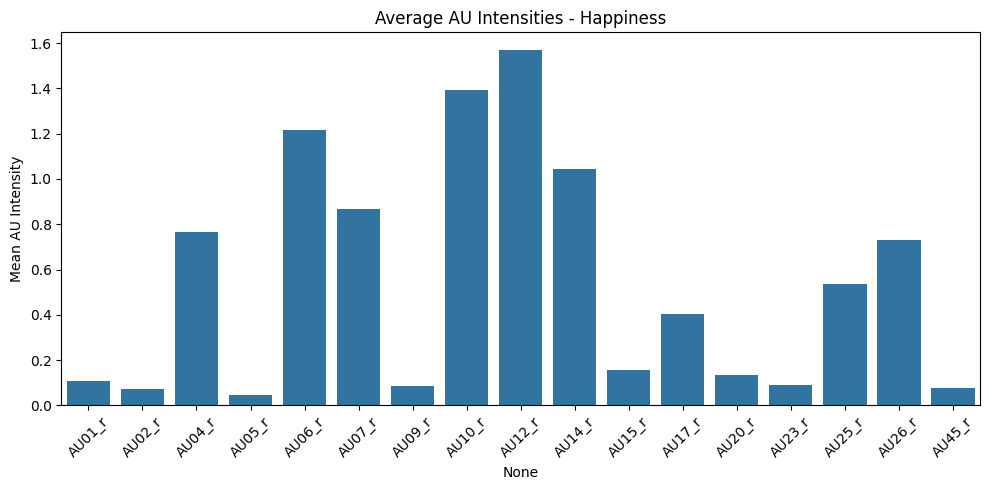

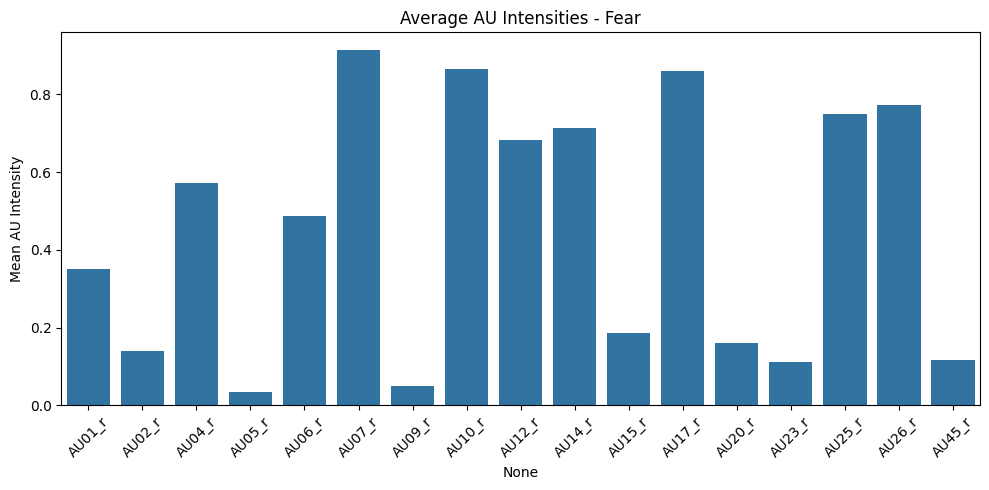

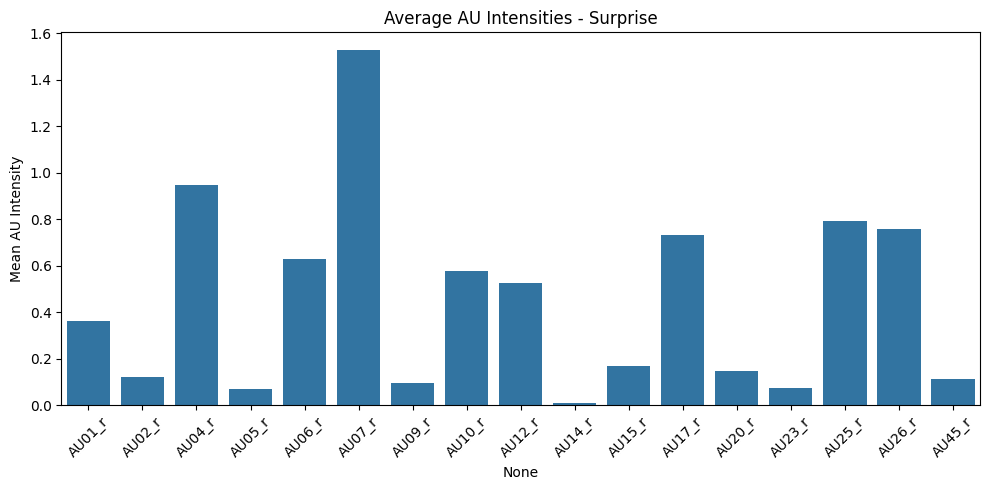

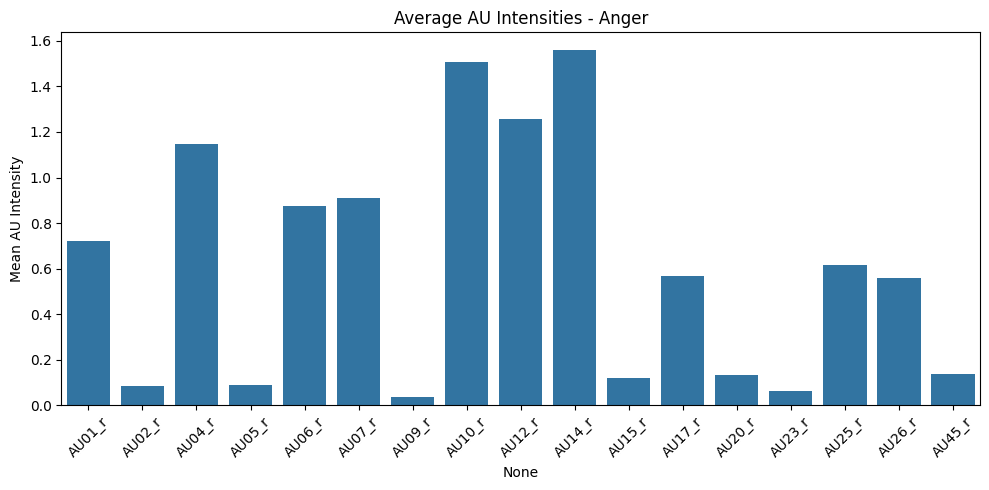

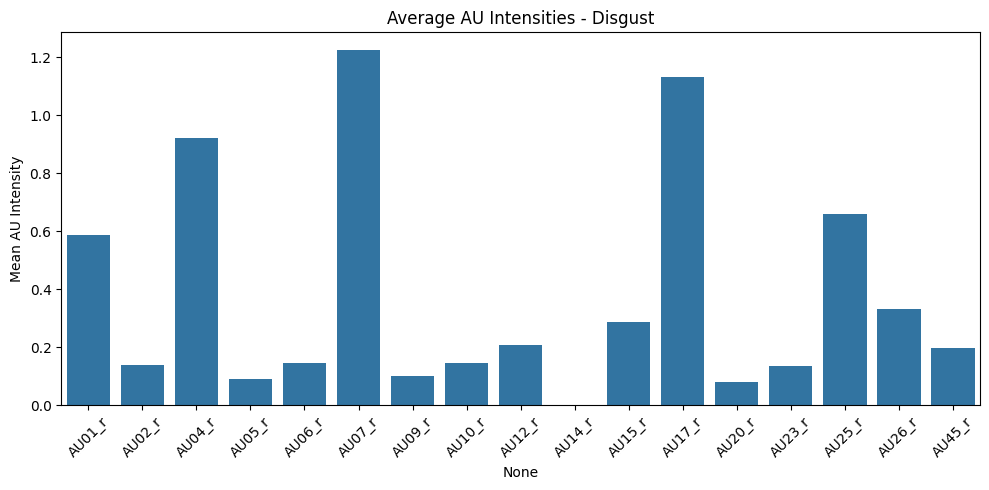

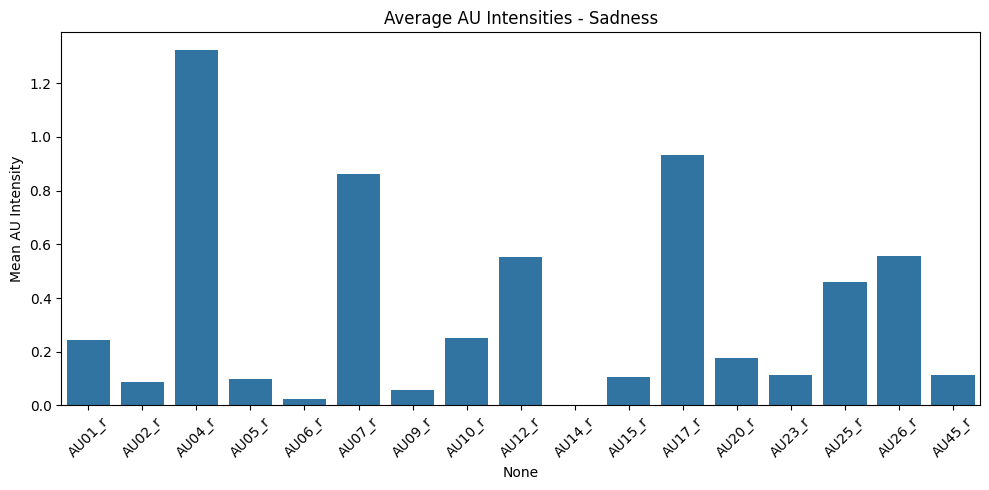

In [4]:
for emotion in emotions:
    emotion_path = os.path.join(base_path, emotion)

    # Look for AU-only CSV
    csv_file = next((f for f in os.listdir(emotion_path) if f.startswith("OpenFace_AU_only_") and f.endswith(".csv")), None)

    if csv_file:
        csv_path = os.path.join(emotion_path, csv_file)
        df = pd.read_csv(csv_path)

        # Filter AU intensity columns (ending with '_r')
        au_columns = [col for col in df.columns if col.endswith('_r')]

        if au_columns:
            mean_aus = df[au_columns].mean()

            # Plot
            plt.figure(figsize=(10, 5))
            sns.barplot(x=mean_aus.index, y=mean_aus.values)
            plt.xticks(rotation=45)
            plt.ylabel("Mean AU Intensity")
            plt.title(f"Average AU Intensities - {emotion.capitalize()}")
            plt.tight_layout()
            plt.show()
        else:
            print(f"No AU intensity columns found in {csv_file}")
    else:
        print(f"No AU-only CSV found in {emotion_path}")
